In [12]:


'''
Here I directly created "crime" as database in mysql by importing  "crime_data.csv" file

so all operatyions are performed here by using data from  mysql


Crime DB 
crime_data table column names
DR_NO,
Date_Rptd = Date Reported,
DATE_OCC,
AREA_NAME,
Crm_Cd = Crime Code,
Crm_Cd_Desc = Crime Code Description,
Vict_Age,
Vict_Sex,
Premis_Desc,
Status, 
Location,
LAT,
LON
'''

print("\n *********  1. Database Creation  ***************\n")




 *********  1. Database Creation  ***************



In [28]:

import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

conn = pymysql.connect(
    host='localhost',
    user='root',
    password="2001",
    db='crime',
)

print("\n *********  2. Database Connection :  ***************\n")


print("Connection Established : ",conn)

cur = conn.cursor()
print("Cursor Created : ",cur,"\n")

Table_desc = "desc crime_data";

cur.execute(Table_desc)
Descript=cur.fetchall()

print("\n Field , Type , Null , Key , Default , Extra \n")

for i in Descript[:]:
    print(i,"\n")



 *********  2. Database Connection :  ***************

Connection Established :  <pymysql.connections.Connection object at 0x0000021106DD5550>
Cursor Created :  <pymysql.cursors.Cursor object at 0x0000021106CF10D0> 


 Field , Type , Null , Key , Default , Extra 

('DR_NO', 'int', 'YES', '', None, '') 

('Date_Rptd', 'text', 'YES', '', None, '') 

('DATE_OCC', 'text', 'YES', '', None, '') 

('AREA_NAME', 'text', 'YES', '', None, '') 

('Crm_Cd', 'int', 'YES', '', None, '') 

('Crm_Cd_Desc', 'text', 'YES', '', None, '') 

('Vict_Age', 'int', 'YES', '', None, '') 

('Vict_Sex', 'text', 'YES', '', None, '') 

('Premis_Desc', 'text', 'YES', '', None, '') 

('Status', 'text', 'YES', '', None, '') 

('Location', 'text', 'YES', '', None, '') 

('LAT', 'double', 'YES', '', None, '') 

('LON', 'double', 'YES', '', None, '') 



In [29]:
d1 = "Select * from crime_data;"
cur.execute(d1)
crime_details = cur.fetchall()

crime_df = pd.DataFrame(crime_details, columns=[desc[0] for desc in cur.description])

null_values = crime_df.isnull().sum() # checking Null
print("\nNull values in the dataset:\n") 
print(null_values)


Null values in the dataset:

DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64


In [31]:
data = "Select * from crime_data;"

cur.execute(data)


print("\n *********  3. Data Exploration:  ***************\n")


Crime_details = cur.fetchall()

# general view
for i in Crime_details[:5]:
    print(i,"\n")

# Created a DataFrame using pandas
crime_df = pd.DataFrame(Crime_details, columns=[desc[0] for desc in cur.description])

print("\n",crime_df,"\n") # Simplified view using dataframe


 *********  3. Data Exploration:  ***************

(10304468, '01-08-2020', '01-08-2020', 'Southwest', 624, 'BATTERY - SIMPLE ASSAULT', 36, 'F', 'SINGLE FAMILY DWELLING', 'AO', '1100 W 39TH PL', 34.01, -118.3) 

(190101086, '01-02-2020', '01-01-2020', 'Central', 624, 'BATTERY - SIMPLE ASSAULT', 25, 'M', 'SIDEWALK', 'IC', '700 S HILL ST', 34.05, -118.25) 

(191501505, '01-01-2020', '01-01-2020', 'N Hollywood', 745, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 76, 'F', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'IC', '5400 CORTEEN PL', 34.17, -118.4) 

(191921269, '01-01-2020', '01-01-2020', 'Mission', 740, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 31, 'X', 'BEAUTY SUPPLY STORE', 'IC', '14400 TITUS ST', 34.22, -118.45) 

(200100502, '01-02-2020', '01-02-2020', 'Central', 442, 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 23, 'M', 'DEPARTMENT STORE', 'IC', '700 S FIGUEROA ST', 34.05, -118.26) 


          DR_NO   Date_Rptd    DATE_OCC    AREA_NAME  Crm_Cd  \
0     1030

In [32]:
print("\n *********   Basic Statistics: ***************\n")
print(crime_df.describe())


 *********   Basic Statistics: ***************

              DR_NO      Crm_Cd    Vict_Age         LAT         LON
count  4.990000e+02  499.000000  499.000000  499.000000  499.000000
mean   1.999930e+08  504.178357   32.142285   34.047335 -118.261283
std    8.742243e+06  198.381863   20.202136    0.053840    0.041560
min    1.030447e+07  210.000000    0.000000   33.710000 -118.560000
25%    2.001044e+08  330.000000   23.000000   34.040000 -118.260000
50%    2.001048e+08  442.000000   31.000000   34.050000 -118.250000
75%    2.001064e+08  624.000000   46.500000   34.050000 -118.240000
max    2.220130e+08  956.000000   78.000000   34.280000 -118.190000


In [33]:
Total = "select count(*) FROM crime_data;"
cur.execute(Total)
total_records = cur.fetchone()[0] # [0] is used to retrive without braces
print(" Total number of records is :\n", total_records,"Records")


 Total number of records is :
 499 Records


In [34]:
# 
print("\n Unique values in specific columns \n")

col_check = ["Crm_Cd", "Crm_Cd_Desc"]  # Add more columns if needed
for column in col_check:
    uniq= f"SELECT COUNT(DISTINCT {column}) FROM crime_data;"
    cur.execute(uniq)
    unique_count = cur.fetchone()[0]
    print(f"Number of unique values in a column with Column Name *{column}* is : {unique_count} Records \n")



 Unique values in specific columns 

Number of unique values in a column with Column Name *Crm_Cd* is : 42 Records 

Number of unique values in a column with Column Name *Crm_Cd_Desc* is : 42 Records 



In [36]:
Distinct = "select distinct Crm_Cd, Crm_Cd_Desc FROM crime_data;"
cur.execute(Distinct)
D_cc = cur.fetchall()
print("\n Distinct Crime Codes and their Descriptions:\n")
Distinct_Count = "select count(*) FROM (select distinct Crm_Cd, Crm_Cd_Desc FROM crime_data) crime_data;"
cur.execute(Distinct_Count)

count = cur.fetchone()[0]

print(" Number of distinct records:", count ,"\n")

for code, description in D_cc:
    print(f"C_Code: {code} , Desc: {description}")



 Distinct Crime Codes and their Descriptions:

 Number of distinct records: 42 

C_Code: 624 , Desc: BATTERY - SIMPLE ASSAULT
C_Code: 745 , Desc: VANDALISM - MISDEAMEANOR ($399 OR UNDER)
C_Code: 740 , Desc: VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)
C_Code: 442 , Desc: SHOPLIFTING - PETTY THEFT ($950 & UNDER)
C_Code: 946 , Desc: OTHER MISCELLANEOUS CRIME
C_Code: 341 , Desc: THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD
C_Code: 330 , Desc: BURGLARY FROM VEHICLE
C_Code: 930 , Desc: CRIMINAL THREATS - NO WEAPON DISPLAYED
C_Code: 648 , Desc: ARSON
C_Code: 354 , Desc: THEFT OF IDENTITY
C_Code: 230 , Desc: ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
C_Code: 761 , Desc: BRANDISH WEAPON
C_Code: 350 , Desc: THEFT, PERSON
C_Code: 310 , Desc: BURGLARY
C_Code: 480 , Desc: BIKE - STOLEN
C_Code: 623 , Desc: BATTERY POLICE (SIMPLE)
C_Code: 440 , Desc: THEFT PLAIN - PETTY ($950 & UNDER)
C_Code: 510 , Desc: VEHICLE - STOLEN
C_Code: 210 , Desc: ROBBERY
C_Code: 900 , Desc: VIO

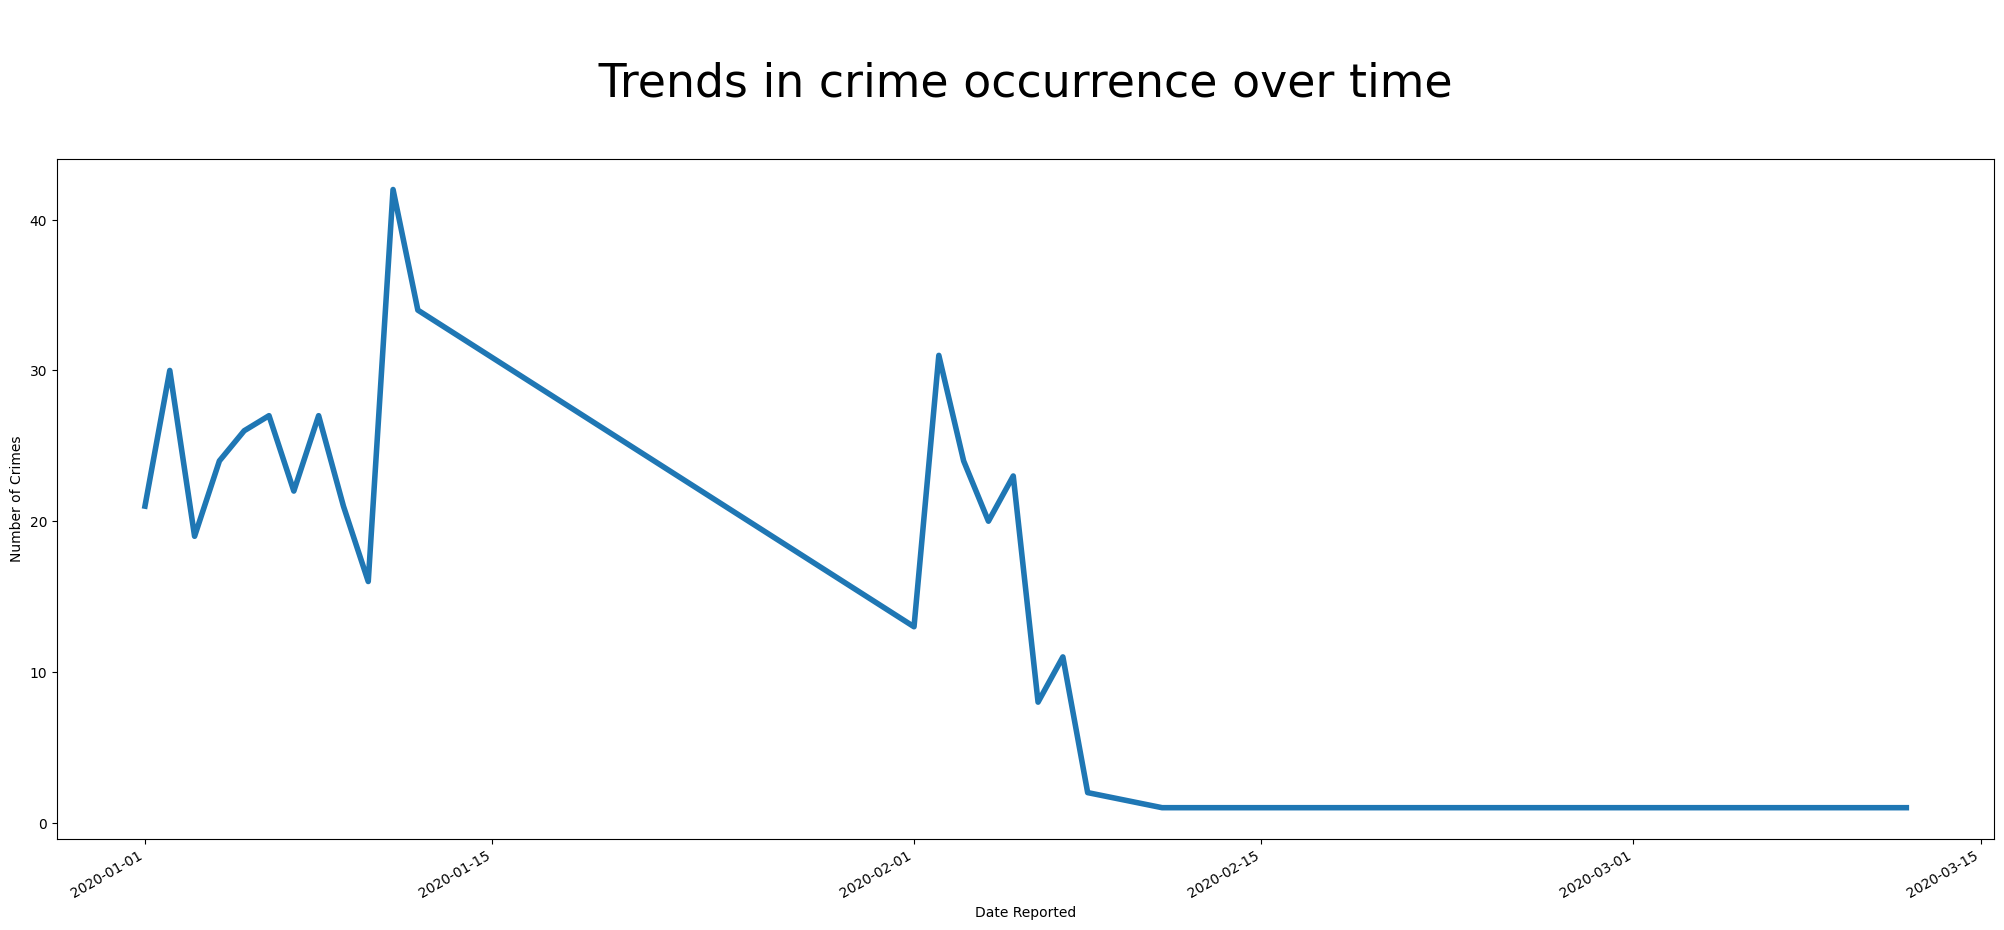

In [37]:
crime_df['Date_Rptd'] = pd.to_datetime(crime_df['Date_Rptd'])

filtered_crime_df = crime_df[(crime_df['Date_Rptd'] >= '2020-01-01') & (crime_df['Date_Rptd'] <= '2020-03-30')]

plt.figure(figsize=(25, 10))
filtered_crime_df['Date_Rptd'].value_counts().sort_index().plot(linewidth=4)
plt.title('\n Trends in crime occurrence over time \n',fontsize=33)
plt.xlabel('Date Reported')
plt.ylabel('Number of Crimes')
plt.show()


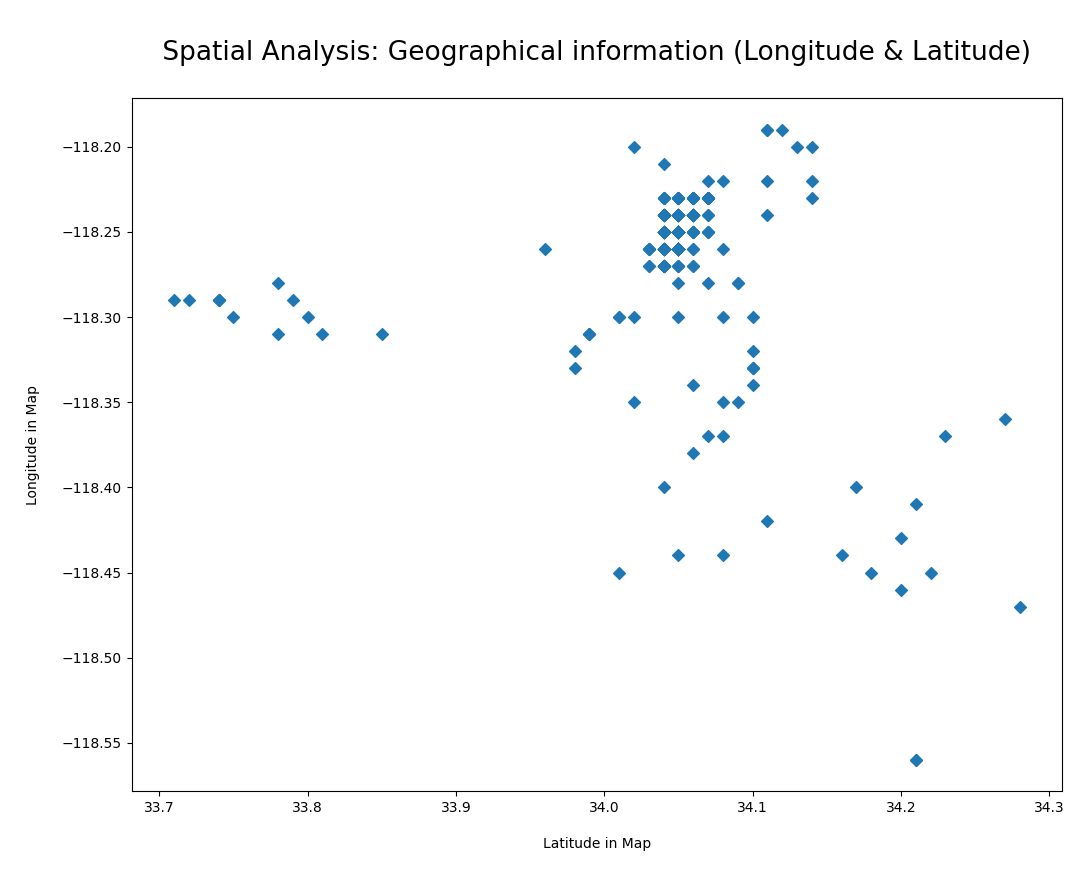

In [50]:
plt.figure(figsize=(12, 9))
plt.scatter(crime_df['LAT'], crime_df['LON'], alpha=1, marker='D')
plt.title('\n Spatial Analysis: Geographical information (Longitude & Latitude) \n',fontsize=19)
plt.xlabel('\nLatitude in Map\n')
plt.ylabel('\nLongitude in Map\n')
plt.show()


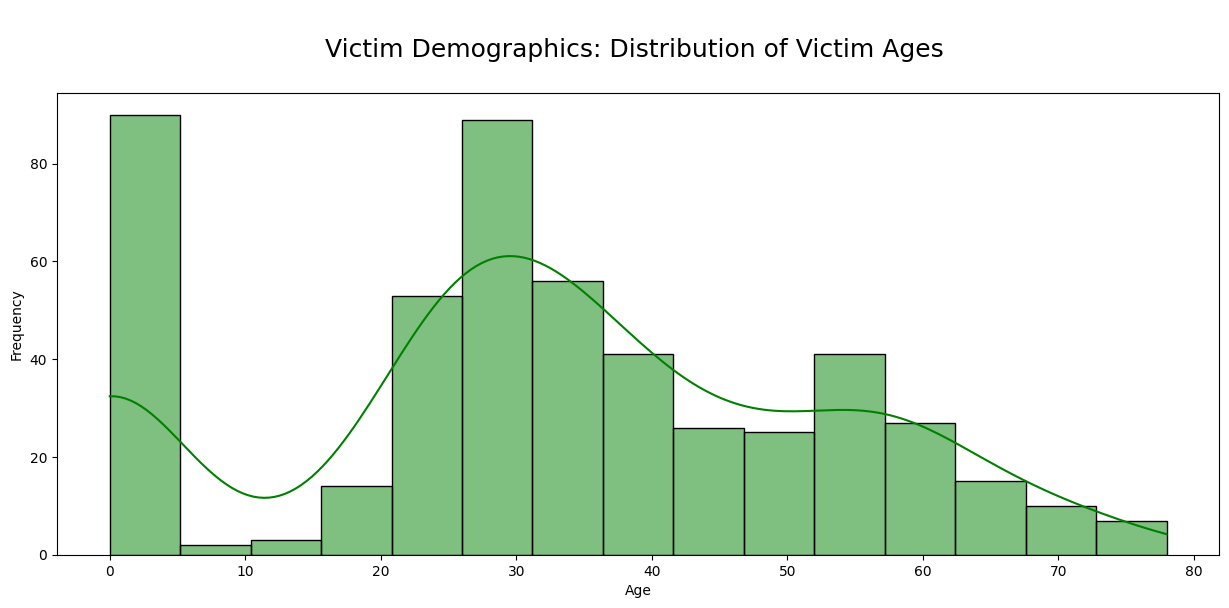

In [39]:
plt.figure(figsize=(15, 6))
sn.histplot(crime_df['Vict_Age'], bins=15, kde=True, color="green")
plt.title('\nVictim Demographics: Distribution of Victim Ages \n',fontsize=18)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

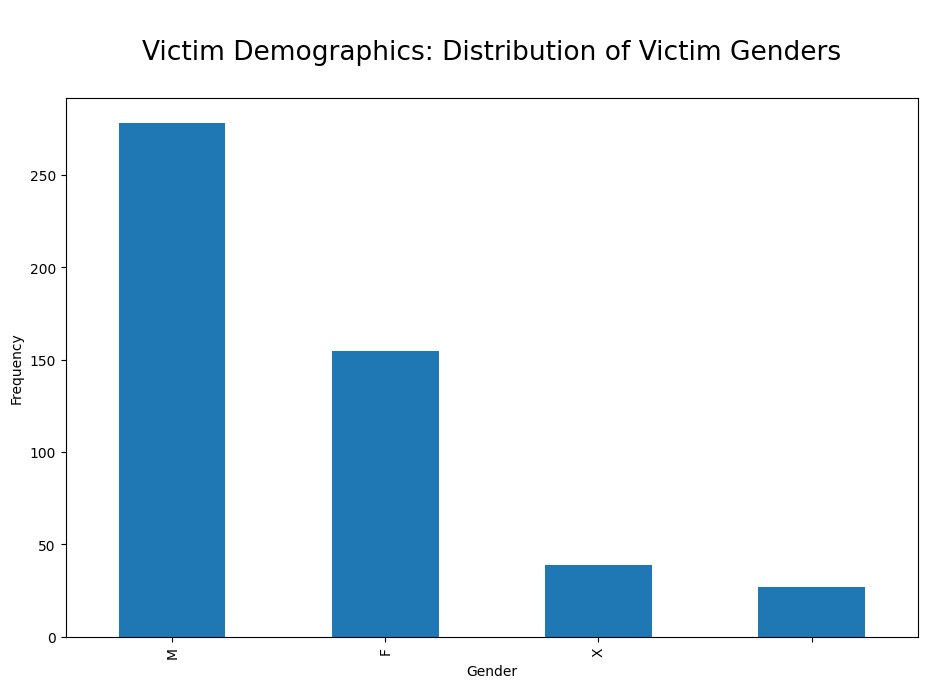

In [40]:
plt.figure(figsize=(11, 7))
crime_df['Vict_Sex'].value_counts().plot(kind='bar')
plt.title('\nVictim Demographics: Distribution of Victim Genders\n',fontsize=19)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

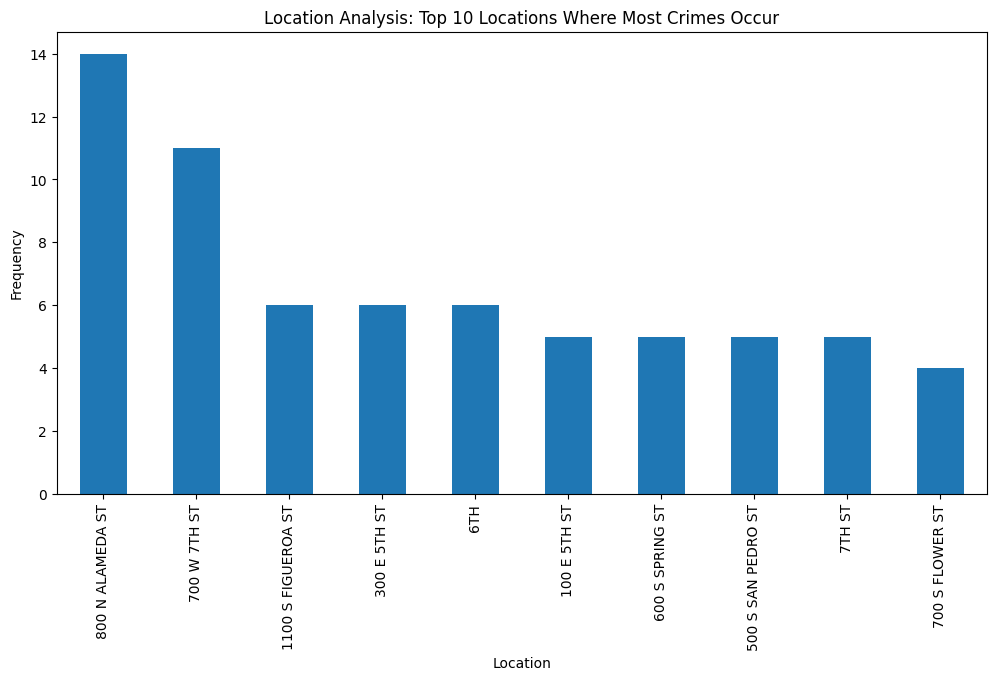

In [41]:
plt.figure(figsize=(12, 6))
crime_df['Location'].value_counts().head(10).plot(kind='bar')  # Displaying top 10 locations by using head
plt.title('Location Analysis: Top 10 Locations Where Most Crimes Occur')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()


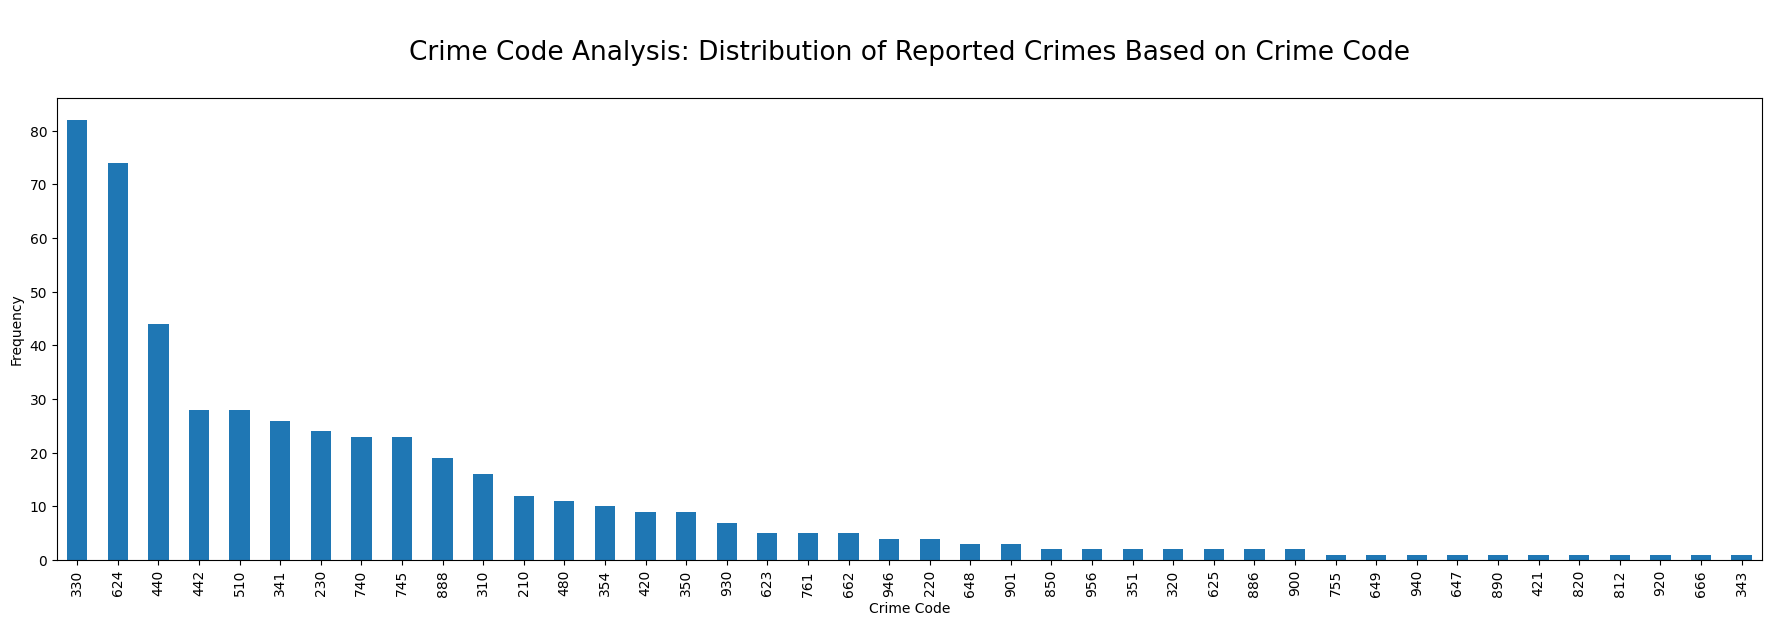

In [42]:
plt.figure(figsize=(22, 6))
crime_df['Crm_Cd'].value_counts().plot(kind='bar')
plt.title('\nCrime Code Analysis: Distribution of Reported Crimes Based on Crime Code\n',fontsize=19)
plt.xlabel('Crime Code')
plt.ylabel('Frequency') 
plt.show()
